In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'을 사용하는 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [3]:
df = pd.read_csv('병합데이터.csv')
df = df.drop(columns = 'Unnamed: 0')

df_log = pd.read_csv('log_clean.csv')
df_ex = pd.read_csv('ex_clean.csv')
df_sv = pd.read_csv('sv_clean.csv') 
df_cus = pd.read_csv('cus_clean.csv')

df_log = df_log.drop(columns = 'Unnamed: 0')
df_ex = df_ex.drop(columns = 'Unnamed: 0')
df_sv = df_sv.drop(columns = 'Unnamed: 0')
df_cus = df_cus.drop(columns = 'Unnamed: 0')
df_sv_grouped = df_sv.groupby(['서비스번호', '서비스명', '판매자', '서비스가격', '평점', '대분류'], as_index=False)['판매수'].sum()

In [16]:
df_ex

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,146181660.0,가입,미사용
1,V2_1,디프라이,43,146666100.0,가입,미사용
2,V2_2,Sailorkr,14,140014500.0,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130656600.0,가입,미사용
4,V2_4,에픽핫,18,126114700.0,가입,미사용
...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,6400.0,미가입,미사용
2062,V2_2062,enos,2,5000.0,미가입,미사용
2063,V2_2063,K9027456501,1,5000.0,미가입,미사용
2064,V2_2064,승쿠딩,1,5000.0,가입,미사용


In [26]:
df_ex[df_ex['신속 알람 서비스 사용여부']== '사용']['판매 서비스 수'].mean()


614.1635883905013

In [28]:
df_ex[df_ex['신속 알람 서비스 사용여부']== '미사용']['판매 서비스 수'].mean()

66.09899229401304

In [5]:
df_z = pd.read_excel('판매자생애주기.xlsx')

In [21]:
df_z['Z_sigmoid']

0       0.865448
1       0.252960
2       0.183046
3       0.253491
4       0.137205
          ...   
1643    0.185937
1644    0.137205
1645    0.279195
1646    0.648605
1647    0.169153
Name: Z_sigmoid, Length: 1648, dtype: float64

In [25]:
df_z = pd.merge(df_z, df_ex, on = '판매자',how= 'inner')

In [27]:
df_z

,판매자,frequency,recency,T,monetary_value,Z,Z_sigmoid,D,ltv,predicted_purchases,predicted_monetary_value,이탈위험도,pre_ltv,판매자ID,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,0to1,3,60,134,3.226667e+04,3.700000,0.865448,74,1.481054e+05,4.489961,3.298589e+04,0.653589,96800.0,V2_1914,16,111800.0,미가입,미사용
1,100ME,65,172,174,5.957292e+05,0.755814,0.252960,2,3.979349e+07,66.731116,5.963259e+05,0.973084,38722400.0,V2_130,433,39196900.0,가입,사용
2,10xDeveloper,30,175,177,1.483907e+05,0.342857,0.183046,2,4.536782e+06,30.506887,1.487134e+05,0.981251,4451720.0,V2_958,175,4647520.0,미가입,미사용
3,10년차웹개발자,44,174,177,9.031727e+04,0.758621,0.253491,3,4.029614e+06,44.550137,9.045122e+04,0.986189,3973960.0,V2_999,160,4021060.0,미가입,사용
4,12년차기획전문가,149,179,179,4.010651e+05,0.000000,0.137205,0,5.947381e+07,148.224939,4.012403e+05,1.004790,59758700.0,V2_21,1177,60180600.0,가입,사용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,회사도움꾼,1,58,79,6.000000e+06,0.362069,0.185937,21,1.965065e+07,3.062179,6.417213e+06,0.305333,6000000.0,V2_785,4,8001600.0,미가입,미사용
1644,효베르,155,179,179,1.476557e+05,0.000000,0.137205,0,2.277471e+07,154.177250,1.477177e+05,1.004914,22886630.0,V2_254,1602,23178130.0,미가입,사용
1645,흐,1,82,155,1.136000e+05,0.890244,0.279195,73,1.903350e+05,1.566375,1.215131e+05,0.596842,113600.0,V2_1880,3,176600.0,미가입,미사용
1646,희몽,4,93,150,1.000000e+04,2.451613,0.648605,57,5.293088e+04,5.205345,1.016856e+04,0.755703,40000.0,V2_2009,5,50000.0,미가입,미사용


In [29]:
df_z['Z_category'] = df_z['Z_sigmoid'].apply(lambda x: 2 if x >= 0.9 else (1 if x >= 0.5 else 0))
df_z

,판매자,frequency,recency,T,monetary_value,Z,Z_sigmoid,D,ltv,predicted_purchases,predicted_monetary_value,이탈위험도,pre_ltv,판매자ID,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,Z_category
0,0to1,3,60,134,3.226667e+04,3.700000,0.865448,74,1.481054e+05,4.489961,3.298589e+04,0.653589,96800.0,V2_1914,16,111800.0,미가입,미사용,1
1,100ME,65,172,174,5.957292e+05,0.755814,0.252960,2,3.979349e+07,66.731116,5.963259e+05,0.973084,38722400.0,V2_130,433,39196900.0,가입,사용,0
2,10xDeveloper,30,175,177,1.483907e+05,0.342857,0.183046,2,4.536782e+06,30.506887,1.487134e+05,0.981251,4451720.0,V2_958,175,4647520.0,미가입,미사용,0
3,10년차웹개발자,44,174,177,9.031727e+04,0.758621,0.253491,3,4.029614e+06,44.550137,9.045122e+04,0.986189,3973960.0,V2_999,160,4021060.0,미가입,사용,0
4,12년차기획전문가,149,179,179,4.010651e+05,0.000000,0.137205,0,5.947381e+07,148.224939,4.012403e+05,1.004790,59758700.0,V2_21,1177,60180600.0,가입,사용,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,회사도움꾼,1,58,79,6.000000e+06,0.362069,0.185937,21,1.965065e+07,3.062179,6.417213e+06,0.305333,6000000.0,V2_785,4,8001600.0,미가입,미사용,0
1644,효베르,155,179,179,1.476557e+05,0.000000,0.137205,0,2.277471e+07,154.177250,1.477177e+05,1.004914,22886630.0,V2_254,1602,23178130.0,미가입,사용,0
1645,흐,1,82,155,1.136000e+05,0.890244,0.279195,73,1.903350e+05,1.566375,1.215131e+05,0.596842,113600.0,V2_1880,3,176600.0,미가입,미사용,0
1646,희몽,4,93,150,1.000000e+04,2.451613,0.648605,57,5.293088e+04,5.205345,1.016856e+04,0.755703,40000.0,V2_2009,5,50000.0,미가입,미사용,1


In [31]:
df_z['Z_category'].value_counts()

Z_category
0    1326
1     181
2     141
Name: count, dtype: int64

In [47]:
k = df_z[df_z['Z_category'] == 1]
k

,판매자,frequency,recency,T,monetary_value,Z,Z_sigmoid,D,ltv,predicted_purchases,predicted_monetary_value,이탈위험도,pre_ltv,판매자ID,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,Z_category
0,0to1,3,60,134,3.226667e+04,3.700000,0.865448,74,1.481054e+05,4.489961,3.298589e+04,0.653589,96800.0,V2_1914,16,111800.0,미가입,미사용,1
5,12년차데브옵스,17,155,177,7.872235e+04,2.412903,0.639732,22,1.380011e+06,17.462888,7.902534e+04,0.969761,1338280.0,V2_1327,43,1543180.0,미가입,미사용,1
7,14소프트,22,158,176,4.221405e+05,2.506329,0.660972,18,9.570370e+06,22.604029,4.233922e+05,0.970400,9287090.0,V2_695,116,9374090.0,미가입,미사용,1
8,1D1Y,42,164,174,1.005519e+05,2.560976,0.673108,10,4.356962e+06,43.263273,1.007081e+05,0.969295,4223180.0,V2_971,196,4300180.0,미가입,미사용,1
15,3DMANIA,22,156,176,1.456672e+06,2.820513,0.727467,20,3.302210e+07,22.602549,1.460990e+06,0.970465,32046790.0,V2_187,117,33849290.0,가입,미사용,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,한나하,5,97,136,6.592000e+04,2.010309,0.542797,39,4.697886e+05,7.033702,6.679109e+04,0.701592,329600.0,V2_1668,48,414400.0,미가입,미사용,1
1601,한도,2,66,174,2.438500e+05,3.272727,0.807528,108,6.181220e+05,2.452380,2.520498e+05,0.789003,487700.0,V2_1493,19,1031400.0,미가입,미사용,1
1610,해피투게더,7,120,177,2.033071e+05,3.325000,0.815522,57,1.524286e+06,7.427752,2.052150e+05,0.933650,1423150.0,V2_1336,31,1640750.0,미가입,미사용,1
1624,호랑이마케팅,19,148,165,3.297768e+05,2.182432,0.585096,17,6.904522e+06,20.865268,3.309098e+05,0.907486,6265760.0,V2_853,83,6493260.0,미가입,미사용,1


C:\Users\campus4D050\AppData\Local\Temp\ipykernel_41928\654738819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['판매금액_제한'] = k['총 판매 금액'].apply(lambda x: min(x, 10000000))
C:\Users\campus4D050\AppData\Local\Temp\ipykernel_41928\654738819.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['판매금액_구간'] = k['판매금액_제한'] // 1000000 * 1000000


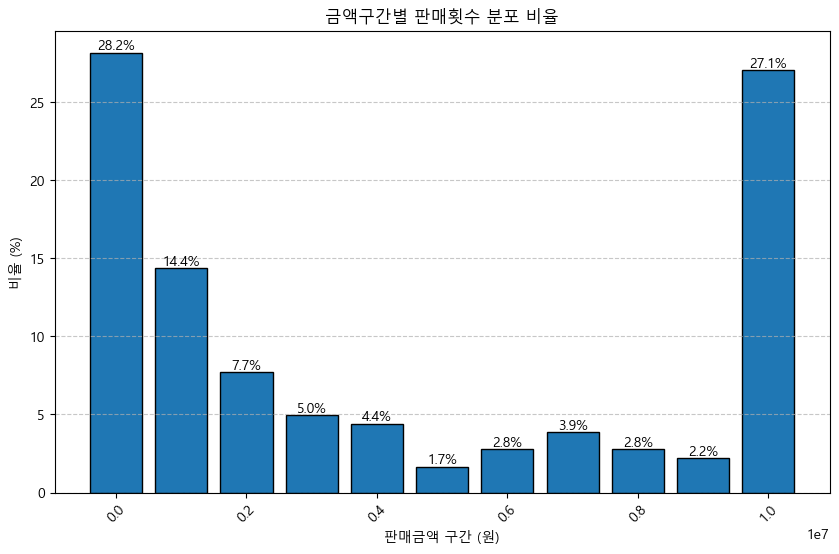

In [55]:
k['판매금액_제한'] = k['총 판매 금액'].apply(lambda x: min(x, 10000000))
'''
conditions = [  # 1000만 원 초과
    month_2_ex['판매금액_제한'] >= 10000000,
    month_2_ex['판매금액_제한'] > 4000000,
    month_2_ex['판매금액_제한'] > 2000000,
    month_2_ex['판매금액_제한'] > 1000000 
]
'''
#choices = [4,3, 2,1]  # 각 조건에 맞는 구간 값

# 조건이 모두 거짓일 경우(300만 원 이하) 기본값으로 0을 설정
#month_2_ex['판매금액_구간'] = np.select(conditions, choices, default=0)
k['판매금액_구간'] = k['판매금액_제한'] // 1000000 * 1000000
# 각 구간별로 데이터의 비율을 계산
# 구간별 데이터의 개수를 세고 전체에서 차지하는 비율을 계산
distribution = k['판매금액_구간'].value_counts(normalize=True).sort_index()

# 구간별 차지 비율을 바 차트로 나타내기
plt.figure(figsize=(10, 6))
bars = plt.bar(distribution.index, distribution.values *100, width=800000,edgecolor='black')  # 비율을 백분율로 표시
plt.title('금액구간별 판매횟수 분포 비율')
plt.xlabel('판매금액 구간 (원)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, value in zip(bars, distribution.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.1f}%', ha='center', va='bottom')


plt.show()

In [57]:
k

,판매자,frequency,recency,T,monetary_value,Z,Z_sigmoid,D,ltv,predicted_purchases,predicted_monetary_value,이탈위험도,pre_ltv,판매자ID,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,Z_category,판매금액_제한,판매금액_구간
0,0to1,3,60,134,3.226667e+04,3.700000,0.865448,74,1.481054e+05,4.489961,3.298589e+04,0.653589,96800.0,V2_1914,16,111800.0,미가입,미사용,1,111800.0,0.0
5,12년차데브옵스,17,155,177,7.872235e+04,2.412903,0.639732,22,1.380011e+06,17.462888,7.902534e+04,0.969761,1338280.0,V2_1327,43,1543180.0,미가입,미사용,1,1543180.0,1000000.0
7,14소프트,22,158,176,4.221405e+05,2.506329,0.660972,18,9.570370e+06,22.604029,4.233922e+05,0.970400,9287090.0,V2_695,116,9374090.0,미가입,미사용,1,9374090.0,9000000.0
8,1D1Y,42,164,174,1.005519e+05,2.560976,0.673108,10,4.356962e+06,43.263273,1.007081e+05,0.969295,4223180.0,V2_971,196,4300180.0,미가입,미사용,1,4300180.0,4000000.0
15,3DMANIA,22,156,176,1.456672e+06,2.820513,0.727467,20,3.302210e+07,22.602549,1.460990e+06,0.970465,32046790.0,V2_187,117,33849290.0,가입,미사용,1,10000000.0,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,한나하,5,97,136,6.592000e+04,2.010309,0.542797,39,4.697886e+05,7.033702,6.679109e+04,0.701592,329600.0,V2_1668,48,414400.0,미가입,미사용,1,414400.0,0.0
1601,한도,2,66,174,2.438500e+05,3.272727,0.807528,108,6.181220e+05,2.452380,2.520498e+05,0.789003,487700.0,V2_1493,19,1031400.0,미가입,미사용,1,1031400.0,1000000.0
1610,해피투게더,7,120,177,2.033071e+05,3.325000,0.815522,57,1.524286e+06,7.427752,2.052150e+05,0.933650,1423150.0,V2_1336,31,1640750.0,미가입,미사용,1,1640750.0,1000000.0
1624,호랑이마케팅,19,148,165,3.297768e+05,2.182432,0.585096,17,6.904522e+06,20.865268,3.309098e+05,0.907486,6265760.0,V2_853,83,6493260.0,미가입,미사용,1,6493260.0,6000000.0


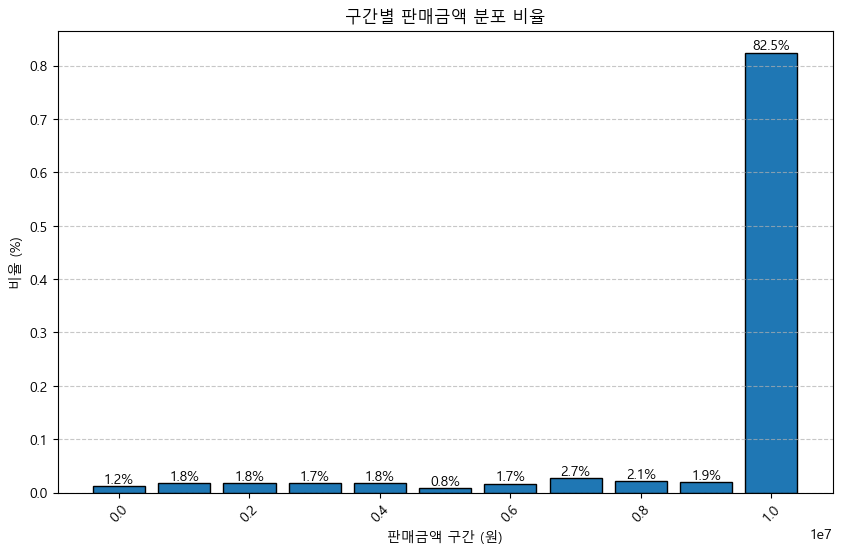

In [65]:
a = pd.pivot_table(k,index = '판매금액_구간', values = '총 판매 금액',aggfunc = 'sum').reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(a['판매금액_구간'],a['총 판매 금액']/a['총 판매 금액'].sum(),width=800000 , edgecolor='black')  # 비율을 백분율로 표시
plt.title('구간별 판매금액 분포 비율')
plt.xlabel('판매금액 구간 (원)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, value in zip(bars, a['총 판매 금액']/a['총 판매 금액'].sum()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.1f}%', ha='center', va='bottom')


plt.show()

In [69]:
k

,판매자,frequency,recency,T,monetary_value,Z,Z_sigmoid,D,ltv,predicted_purchases,predicted_monetary_value,이탈위험도,pre_ltv,판매자ID,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,Z_category,판매금액_제한,판매금액_구간
0,0to1,3,60,134,3.226667e+04,3.700000,0.865448,74,1.481054e+05,4.489961,3.298589e+04,0.653589,96800.0,V2_1914,16,111800.0,미가입,미사용,1,111800.0,0.0
5,12년차데브옵스,17,155,177,7.872235e+04,2.412903,0.639732,22,1.380011e+06,17.462888,7.902534e+04,0.969761,1338280.0,V2_1327,43,1543180.0,미가입,미사용,1,1543180.0,1000000.0
7,14소프트,22,158,176,4.221405e+05,2.506329,0.660972,18,9.570370e+06,22.604029,4.233922e+05,0.970400,9287090.0,V2_695,116,9374090.0,미가입,미사용,1,9374090.0,9000000.0
8,1D1Y,42,164,174,1.005519e+05,2.560976,0.673108,10,4.356962e+06,43.263273,1.007081e+05,0.969295,4223180.0,V2_971,196,4300180.0,미가입,미사용,1,4300180.0,4000000.0
15,3DMANIA,22,156,176,1.456672e+06,2.820513,0.727467,20,3.302210e+07,22.602549,1.460990e+06,0.970465,32046790.0,V2_187,117,33849290.0,가입,미사용,1,10000000.0,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,한나하,5,97,136,6.592000e+04,2.010309,0.542797,39,4.697886e+05,7.033702,6.679109e+04,0.701592,329600.0,V2_1668,48,414400.0,미가입,미사용,1,414400.0,0.0
1601,한도,2,66,174,2.438500e+05,3.272727,0.807528,108,6.181220e+05,2.452380,2.520498e+05,0.789003,487700.0,V2_1493,19,1031400.0,미가입,미사용,1,1031400.0,1000000.0
1610,해피투게더,7,120,177,2.033071e+05,3.325000,0.815522,57,1.524286e+06,7.427752,2.052150e+05,0.933650,1423150.0,V2_1336,31,1640750.0,미가입,미사용,1,1640750.0,1000000.0
1624,호랑이마케팅,19,148,165,3.297768e+05,2.182432,0.585096,17,6.904522e+06,20.865268,3.309098e+05,0.907486,6265760.0,V2_853,83,6493260.0,미가입,미사용,1,6493260.0,6000000.0


In [111]:
# 기존 환급 계산 함수 재정의
def calculate_tiered_refund(sale_amount):
    refund_amount = 0  

    # 구간별로 판매 금액 분할 및 환급율 적용
    
    if sale_amount > 10000000:  # 1000만 원 이상
        refund_amount += (sale_amount - 10000000) * 0.03
        sale_amount = 10000000  # 다음 구간으로 한정4
    if sale_amount > 5000000:   # 500만 원 이상
        refund_amount += (sale_amount - 5000000) * 0.05  # 50% 환급 수수료5%
        sale_amount = 5000000  # 다음 구간으로 한정
    if sale_amount > 2000000:   # 200만 원 이상
        refund_amount += (sale_amount - 2000000) * 0.07  # 30% 환급 수수료7%
        sale_amount = 2000000  # 다음 구간으로 한정
    if sale_amount > 1000000:   # 100만 원 이상
        refund_amount += (sale_amount - 1000000) * 0.09  # 10% 환급 수수료9%
        sale_amount = 1000000
    if sale_amount <= 1000000:
        refund_amount += (sale_amount) * 0.1
    
    return refund_amount


In [116]:
calculate_tiered_refund(7500000) / 7500000

0.07

In [118]:
df_z['']

,판매자,frequency,recency,T,monetary_value,Z,Z_sigmoid,D,ltv,predicted_purchases,predicted_monetary_value,이탈위험도,pre_ltv,판매자ID,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,Z_category
0,0to1,3,60,134,3.226667e+04,3.700000,0.865448,74,1.481054e+05,4.489961,3.298589e+04,0.653589,96800.0,V2_1914,16,111800.0,미가입,미사용,1
1,100ME,65,172,174,5.957292e+05,0.755814,0.252960,2,3.979349e+07,66.731116,5.963259e+05,0.973084,38722400.0,V2_130,433,39196900.0,가입,사용,0
2,10xDeveloper,30,175,177,1.483907e+05,0.342857,0.183046,2,4.536782e+06,30.506887,1.487134e+05,0.981251,4451720.0,V2_958,175,4647520.0,미가입,미사용,0
3,10년차웹개발자,44,174,177,9.031727e+04,0.758621,0.253491,3,4.029614e+06,44.550137,9.045122e+04,0.986189,3973960.0,V2_999,160,4021060.0,미가입,사용,0
4,12년차기획전문가,149,179,179,4.010651e+05,0.000000,0.137205,0,5.947381e+07,148.224939,4.012403e+05,1.004790,59758700.0,V2_21,1177,60180600.0,가입,사용,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,회사도움꾼,1,58,79,6.000000e+06,0.362069,0.185937,21,1.965065e+07,3.062179,6.417213e+06,0.305333,6000000.0,V2_785,4,8001600.0,미가입,미사용,0
1644,효베르,155,179,179,1.476557e+05,0.000000,0.137205,0,2.277471e+07,154.177250,1.477177e+05,1.004914,22886630.0,V2_254,1602,23178130.0,미가입,사용,0
1645,흐,1,82,155,1.136000e+05,0.890244,0.279195,73,1.903350e+05,1.566375,1.215131e+05,0.596842,113600.0,V2_1880,3,176600.0,미가입,미사용,0
1646,희몽,4,93,150,1.000000e+04,2.451613,0.648605,57,5.293088e+04,5.205345,1.016856e+04,0.755703,40000.0,V2_2009,5,50000.0,미가입,미사용,1
